In [196]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_curve, roc_auc_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [197]:
# Leemos el excel
data = pd.read_excel('./Default.xlsx')

In [198]:
# Visualizamos los 5 primeros registros
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [199]:
# Vemos información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [200]:
# Vemos información numérica del dataset
data.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [201]:
# Comprobamos si el dataset contiene valores nulos
data.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [202]:
# Visualizamos el nombre de las columnas
data.columns

Index(['Unnamed: 0', 'default', 'student', 'balance', 'income'], dtype='object')

In [203]:
# Comprobamos valores únicos de cada columna
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

Unnamed: 0: [    1     2     3 ...  9998  9999 10000]
default: ['No' 'Yes']
student: ['No' 'Yes']
balance: [ 729.52649521  817.18040656 1073.54916401 ...  845.41198922 1569.00905338
  200.92218263]
income: [44361.62507427 12106.13470031 31767.1389474  ... 58636.15698381
 36669.11236458 16862.95232094]


In [204]:
# Borramos la columna 'Unnamed: 0' ya que es sólo un índice del dataset y no nos aporta ningún valor
data = data.drop(columns=['Unnamed: 0'])

In [205]:
# Convertimos variables categóricas de las columnas 'default' y 'student' en numéricas
data['default'] = data['default'].map({'No': 0, 'Yes': 1})
data['student'] = data['student'].map({'No': 0, 'Yes': 1})

In [206]:
# Comprobamos el cambio en las columnas anteriores mostrando 5 registros aleatorios
data.sample(5)

,default,student,balance,income
8331,0,1,838.459955,19805.875235
4187,0,0,352.746536,41548.882945
195,0,0,966.280288,33440.979300
8674,0,0,102.721441,13719.356875
5285,1,1,1936.061862,13377.828841


In [207]:
# Asiganamos las variable independientes a X y la variable target a y
X = data.drop('default', axis=1)
y = data['default']

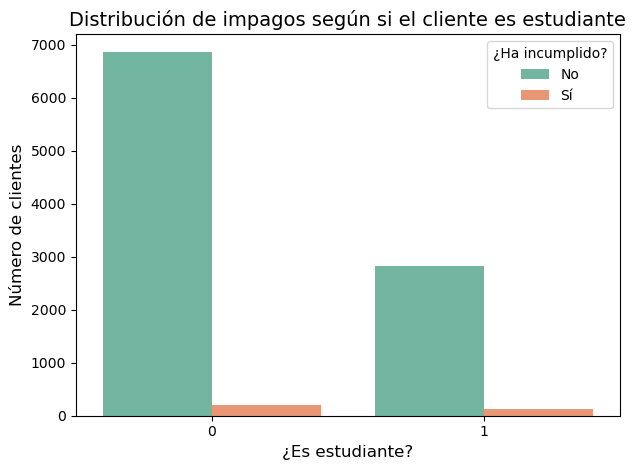

In [208]:
# student vs default
sns.countplot(data=data, x='student', hue='default', palette='Set2')
plt.title('Distribución de impagos según si el cliente es estudiante', fontsize=14)
plt.xlabel('¿Es estudiante?', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend(title='¿Ha incumplido?', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

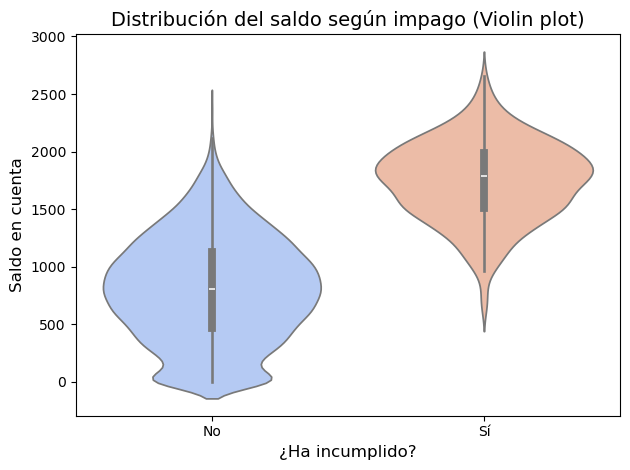

In [209]:
# balance vs default
sns.violinplot(data=data, x='default', y='balance', hue='default', palette='coolwarm', legend=False)
plt.title('Distribución del saldo según impago (Violin plot)', fontsize=14)
plt.xlabel('¿Ha incumplido?', fontsize=12)
plt.ylabel('Saldo en cuenta', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()

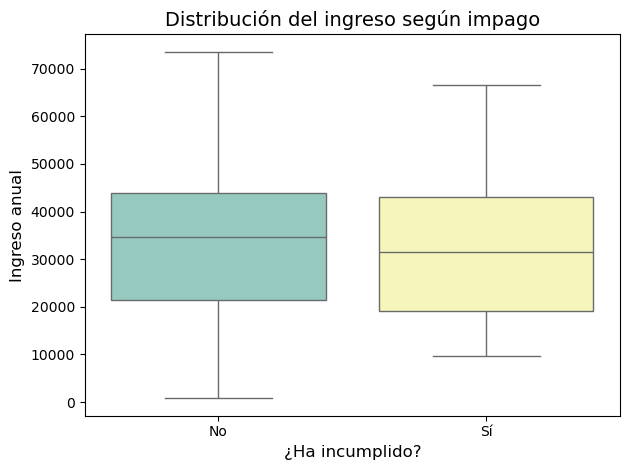

In [210]:
# income vs default
sns.boxplot(data=data, x='default', y='income', hue='default', palette='Set3', legend=False)
plt.title('Distribución del ingreso según impago', fontsize=14)
plt.xlabel('¿Ha incumplido?', fontsize=12)
plt.ylabel('Ingreso anual', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()

In [211]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [212]:
# Creamos el modelo 1
model_1 = LogisticRegression(random_state=42)

In [213]:
# Entrenamos el modelo 1
model_1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [214]:
# Realizamos predicción del modelo 1
y_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


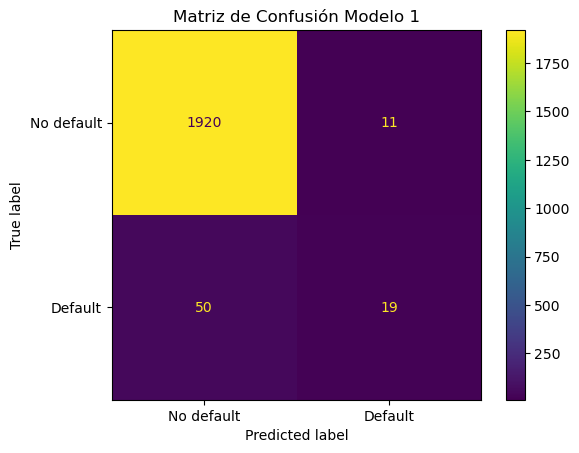

In [215]:
# Mostramos Matriz de Confusión del modelo 1
cm_1 = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=['No default', 'Default'])
display.plot(cmap=plt.cm.viridis)
plt.title("Matriz de Confusión Modelo 1")
plt.show()

In [216]:
# Mostramos la Especificidad y Classification Report del Modelo 1
TN, FP, FN, TP = cm_1.ravel()

specificity_model_1 = TN / (TN + FP)
print(f'Especificidad modelo 1: {specificity_model_1:.2f}')

report = classification_report(y_test, y_pred, target_names=['No default', 'Default'])
print(report)

Especificidad modelo 1: 0.99
              precision    recall  f1-score   support

  No default       0.97      0.99      0.98      1931
     Default       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



In [217]:
X1 = sm.add_constant(X_train)
model_sm1 = sm.Logit(y_train, X1).fit()
print(model_sm1.summary())

Optimization terminated successfully.
         Current function value: 0.076032
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.4757
Time:                        16:26:05   Log-Likelihood:                -608.26
converged:                       True   LL-Null:                       -1160.2
Covariance Type:            nonrobust   LLR p-value:                5.404e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3117      0.577    -19.614      0.000     -12.442     -10.181
student       -0.4881      0

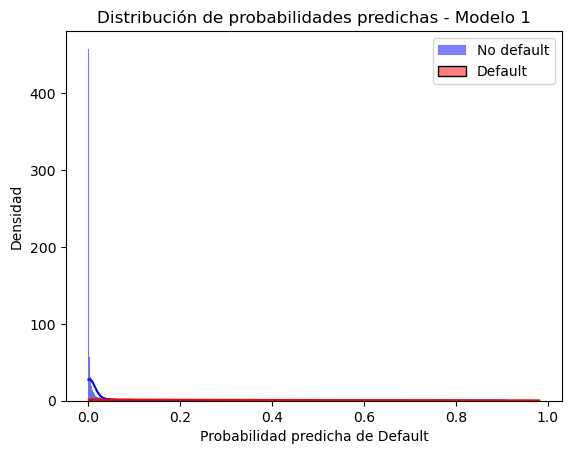

In [218]:
# Gráfico probabilidades predichas vs observadas del Modelo 1
X1_const = sm.add_constant(X_train)
pred_probs = model_sm1.predict(X1_const)

sns.histplot(pred_probs[y_train == 0], color="blue", label="No default", stat='density', kde=True)
sns.histplot(pred_probs[y_train == 1], color="red", label="Default", stat='density', kde=True)
plt.title("Distribución de probabilidades predichas - Modelo 1")
plt.xlabel("Probabilidad predicha de Default")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [219]:
# Creamos el modelo 2 balanceando clases con 'class_weight=balanced'
model_2 = LogisticRegression(class_weight='balanced', random_state=42)

In [220]:
# Entrenamos el modelo
model_2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [221]:
# Realizamos predicción del modelo 2
y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


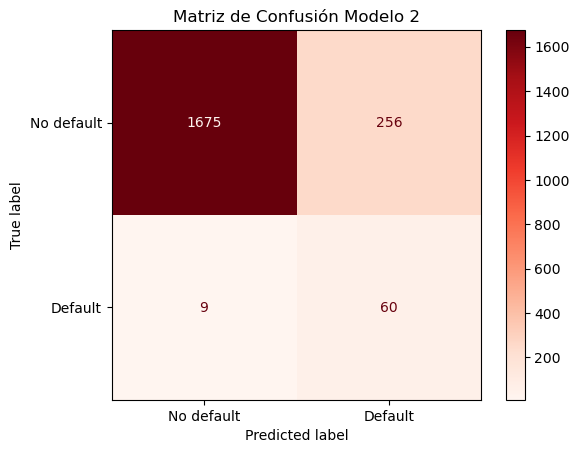

In [222]:
# Mostramos Matriz de Confusión del modelo 2
cm_2 = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['No default', 'Default'])
display.plot(cmap=plt.cm.Reds)
plt.title("Matriz de Confusión Modelo 2")
plt.show()

In [223]:
# Mostramos la Especificidad y Classification Report del Modelo 2
TN, FP, FN, TP = cm_2.ravel()

specificity_model_2 = TN / (TN + FP)
print(f'Especificidad modelo 2: {specificity_model_2:.2f}')

report = classification_report(y_test, y_pred, target_names=['No default', 'Default'])
print(report)

Especificidad modelo 2: 0.87
              precision    recall  f1-score   support

  No default       0.99      0.87      0.93      1931
     Default       0.19      0.87      0.31        69

    accuracy                           0.87      2000
   macro avg       0.59      0.87      0.62      2000
weighted avg       0.97      0.87      0.91      2000



In [224]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
X2 = sm.add_constant(X_train)
model_sm2 = sm.Logit(y_train, X2).fit(weights=sample_weights)
print(model_sm2.summary())

Optimization terminated successfully.
         Current function value: 0.076032
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.4757
Time:                        16:26:16   Log-Likelihood:                -608.26
converged:                       True   LL-Null:                       -1160.2
Covariance Type:            nonrobust   LLR p-value:                5.404e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3117      0.577    -19.614      0.000     -12.442     -10.181
student       -0.4881      0

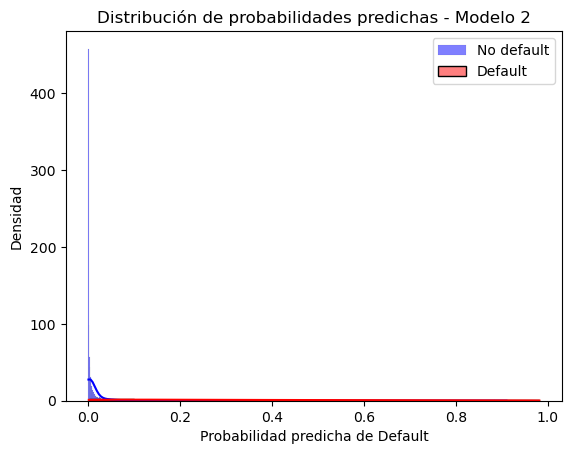

In [225]:
# Gráfico probabilidades predichas vs observadas del Modelo 2
X2_const = sm.add_constant(X_train)
pred_probs = model_sm2.predict(X2_const)

sns.histplot(pred_probs[y_train == 0], color="blue", label="No default", stat='density', kde=True)
sns.histplot(pred_probs[y_train == 1], color="red", label="Default", stat='density', kde=True)
plt.title("Distribución de probabilidades predichas - Modelo 2")
plt.xlabel("Probabilidad predicha de Default")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [226]:
# Creamo el modelo 3 balanceando clases con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model_3 = LogisticRegression(random_state=42)

In [227]:
# Entrenamos el modelo 3
model_3.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

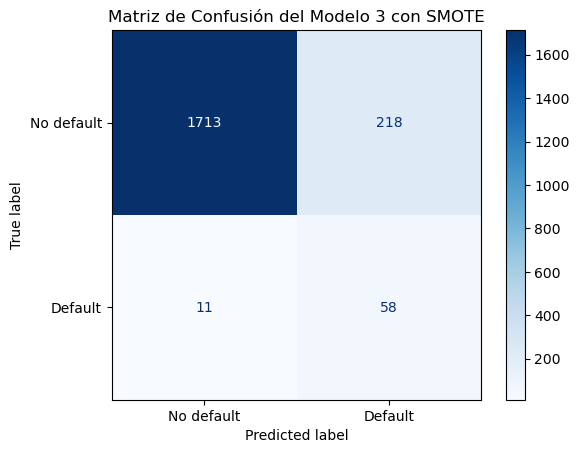

In [228]:
# Mostramos Matriz de Confusión del modelo 3
cm_3 = confusion_matrix(y_test, y_pred_smote)
display = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=['No default', 'Default'])
display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión del Modelo 3 con SMOTE")
plt.show()

In [229]:
# Realizamos prediccion y mostramos Classification Report del Modelo 
TN, FP, FN, TP = cm_3.ravel()

specificity_model_3 = TN / (TN + FP)
print(f'Especificidad modelo 2: {specificity_model_3:.2f}')

y_pred_smote = model_3.predict(X_test)
print(classification_report(y_test, y_pred_smote, target_names=['No default', 'Default']))

Especificidad modelo 2: 0.89
              precision    recall  f1-score   support

  No default       0.99      0.89      0.94      1931
     Default       0.21      0.84      0.34        69

    accuracy                           0.89      2000
   macro avg       0.60      0.86      0.64      2000
weighted avg       0.97      0.89      0.92      2000



In [230]:
X3 = sm.add_constant(X_resampled)
model_sm3 = sm.Logit(y_resampled, X3).fit()
print(model_sm3.summary())

Optimization terminated successfully.
         Current function value: 0.233790
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                15472
Model:                          Logit   Df Residuals:                    15468
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.6627
Time:                        16:26:28   Log-Likelihood:                -3617.2
converged:                       True   LL-Null:                       -10724.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3284      0.222    -42.095      0.000      -9.763      -8.894
student       -1.0833      0.

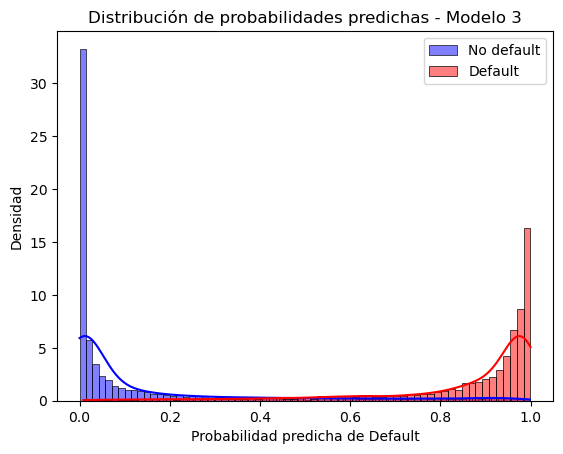

In [231]:
# Gráfico probabilidades predichas vs observadas del Modelo 3
X3_const = sm.add_constant(X_resampled)
pred_probs = model_sm3.predict(X3_const)

sns.histplot(pred_probs[y_resampled == 0], color="blue", label="No default", stat='density', kde=True)
sns.histplot(pred_probs[y_resampled == 1], color="red", label="Default", stat='density', kde=True)
plt.title("Distribución de probabilidades predichas - Modelo 3")
plt.xlabel("Probabilidad predicha de Default")
plt.ylabel("Densidad")
plt.legend()
plt.show()

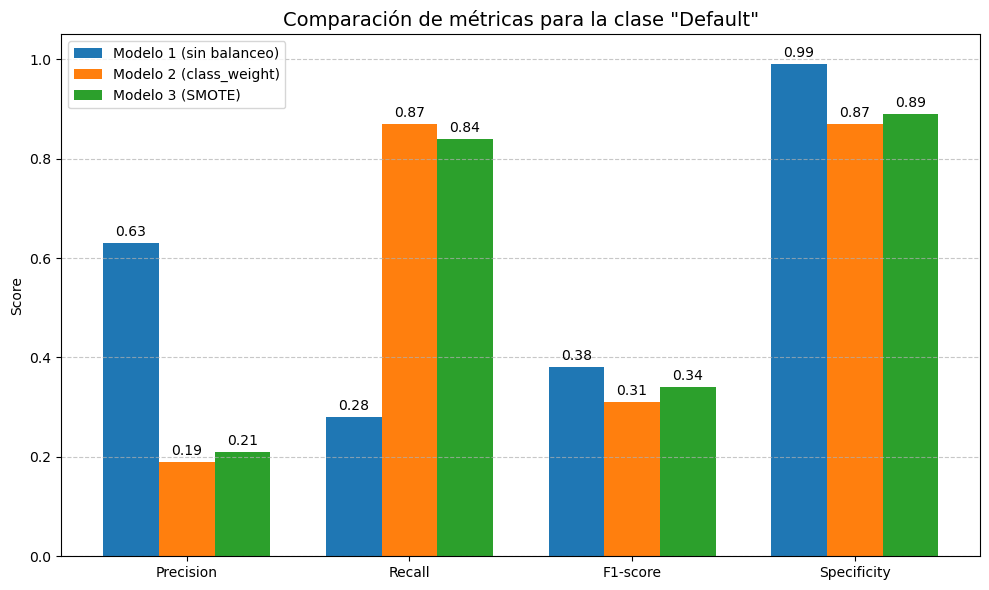

In [232]:
# Métricas para la clase "Default" incluyendo especificidad
metrics_model1 = [0.63, 0.28, 0.38, 0.99]  # sin balanceo
metrics_model2 = [0.19, 0.87, 0.31, 0.87]  # class_weight
metrics_model3 = [0.21, 0.84, 0.34, 0.89]  # SMOTE

labels = ['Precision', 'Recall', 'F1-score', 'Specificity']
x = np.arange(len(labels))  # posiciones
width = 0.25  # ancho de barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, metrics_model1, width, label='Modelo 1 (sin balanceo)')
bars2 = ax.bar(x, metrics_model2, width, label='Modelo 2 (class_weight)')
bars3 = ax.bar(x + width, metrics_model3, width, label='Modelo 3 (SMOTE)')

# Añadir texto encima de las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score')
ax.set_title('Comparación de métricas para la clase "Default"', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

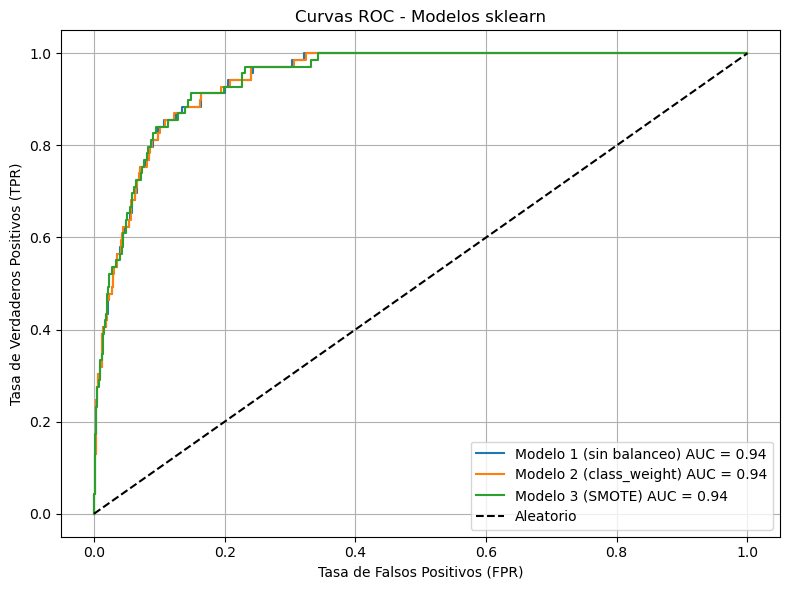

In [233]:
# Curva ROC-AUC

# Obtener probabilidades
y_scores_1 = model_1.predict_proba(X_test)[:, 1]
y_scores_2 = model_2.predict_proba(X_test)[:, 1]
y_scores_3 = model_3.predict_proba(X_test)[:, 1]

# Calcular curvas ROC y AUC
fpr1, tpr1, _ = roc_curve(y_test, y_scores_1)
fpr2, tpr2, _ = roc_curve(y_test, y_scores_2)
fpr3, tpr3, _ = roc_curve(y_test, y_scores_3)

auc1 = roc_auc_score(y_test, y_scores_1)
auc2 = roc_auc_score(y_test, y_scores_2)
auc3 = roc_auc_score(y_test, y_scores_3)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Modelo 1 (sin balanceo) AUC = {auc1:.2f}')
plt.plot(fpr2, tpr2, label=f'Modelo 2 (class_weight) AUC = {auc2:.2f}')
plt.plot(fpr3, tpr3, label=f'Modelo 3 (SMOTE) AUC = {auc3:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

plt.title('Curvas ROC - Modelos sklearn')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Objetivo
'''Predecir si un cliente caerá en default (impago), utilizando características como su saldo, ingresos y si es estudiante, 
evaluando diferentes estrategias para tratar el desbalanceo de clases.'''

# Interpretación de resultados con ScikitLearn
''' Modelo 1 (sin balanceo) presenta la mayor accuracy (97%) y una precisión del 63% para la clase Default, pero tiene un recall muy bajo (28%).
Esto indica que el modelo ignora la mayoría de los impagos, lo que lo hace poco útil en escenarios donde no detectar un impago representa un 
alto riesgo financiero.
Su especificidad (99%) es alta, lo que significa que identifica bien a los clientes que no incumplen, pero a costa de ignorar a los que sí lo hacen.

Modelo 2 (con class_weight='balanced') mejora radicalmente el recall (87%), capturando casi todos los casos de impago.
Sin embargo, su precisión baja (19%) implica que genera muchos falsos positivos, es decir, clientes marcados como riesgosos que realmente no lo son.
Esto puede derivar en decisiones conservadoras que afecten los ingresos por rechazar clientes potencialmente válidos. Su especificidad se reduce al 87%.

Modelo 3 (con SMOTE) consigue un mejor equilibrio entre precision (21%), recall (84%) y F1-score (34%).
Reduce ligeramente la sensibilidad respecto al modelo 2, pero mejora tanto la precisión como la especificidad (89%), lo que minimiza los falsos 
positivos.
Es el modelo más balanceado en términos de coste-beneficio.'''

# Conclusiones con scikitlearn
''' Si la prioridad es identificar la mayoria de los impagos aunque los falsos positivos aumenten, el Modelo 2 (class_weight) es la mejor opción.
Si lo que se busca es un equilibrio entre precisión y recall para minimizar tanto falsos positivos como impagos no detectados, el Modelo 3 (SMOTE) 
es el más adecuado y el más recomendable para producción.
El Modelo 1, aunque con alta precisión general, no es recomendable para problemas con clases desbalanceadas y donde los falsos negativos (no detectar 
impagos) es crítico.'''

# Comparación de resultados con statsmodels
''' En los tres modelos, la variable balance es altamente significativa (p < 0.001) y tiene un coeficiente positivo: a mayor saldo, 
mayor probabilidad de impago.

- student no es significativa en los modelos 1 y 2 (p = 0.074), pero sí lo es en el modelo 3 (p < 0.001), indicando que al aplicar SMOTE, 
la variable estudiante pasa a tener un efecto significativo (negativo: reduce la probabilidad de impago).

- income no es significativa en ningún modelo (p > 0.4 en los modelos 1 y 2, y p = 0.801 en el modelo 3), lo que indica que no tiene impacto 
relevante sobre el riesgo de default en esta muestra.'''

# Conclusiones con statsmodels
''' Teniendo en cuenta el Log-Likelihood y R² observamos que tanto el modelo 1 (sin balanceo) como el modelo 2 (con class_weight) presentan el mismo 
Log-Likelihood de -608.26 y el mismo R² de 0.4757 mientras que el modelo 3 (SMOTE) presenta -3617.2 y 0.6627 respectivamente por lo que, teniendo en 
cuenta estos valores, es este último modelo el que presenta un mejor ajuste teniendo el Log-Likelihood más bajo y R² más alto.